In [4]:
import os 

import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set(font_scale=1.2, palette='Set2') 


In [10]:
seed = 42

In [43]:
def init_random_state(seed):
    np.random.seed(int(seed))
    random.seed = int(seed)
    return seed

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [12]:
init_random_state(seed)

42

In [138]:
T = 1000
M = 5
l = 2

In [139]:
interest = [np.random.randn(M)]
TS_params = [sps.uniform.rvs(size=(M, 2))]
probalities = []
recomendations = []
response = []

In [140]:
for t in range(T):
    probalities.append(
        sps.beta(a = TS_params[t][:,0], b = TS_params[t][:,1]).rvs()
    )
    
    recomendations.append(np.argsort(probalities[t])[:l])
    
    response.append(
        sps.bernoulli(
            p=sigmoid(interest[t][recomendations[t]])
        ).rvs()
    )
    
    new_params = TS_params[t].copy()
    new_params[recomendations[t]] += np.vstack([response[t], 1-response[t]]).T
    TS_params.append(new_params)
    
    bias = sps.uniform(0, 0.01).rvs(l)
    new_interest = interest[t].copy()
    new_interest[recomendations[t]] += response[t]*bias - bias*(1-response[t]) 
    interest.append(new_interest)

In [141]:
interest = np.array(interest)
TS_params = np.array(TS_params)
probalities = np.array(probalities)
recomendations = np.array(recomendations)
response = np.array(response)

In [142]:
# print(probalities)
# print(recomendations)
# print(response)
# print(interest)
# print(TS_params[1] - TS_params[0])

In [143]:
sum_responce = np.cumsum(response.sum(axis=1))

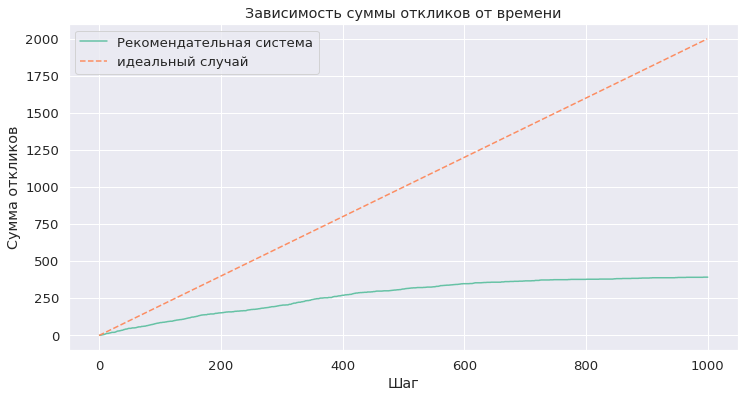

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, T+1), sum_responce, label='Рекомендательная система')
plt.plot(np.arange(T)*l, label='идеальный случай', linestyle='--')
plt.title('Зависимость суммы откликов от времени')
plt.ylabel('Сумма откликов')
plt.xlabel('Шаг')
plt.legend()

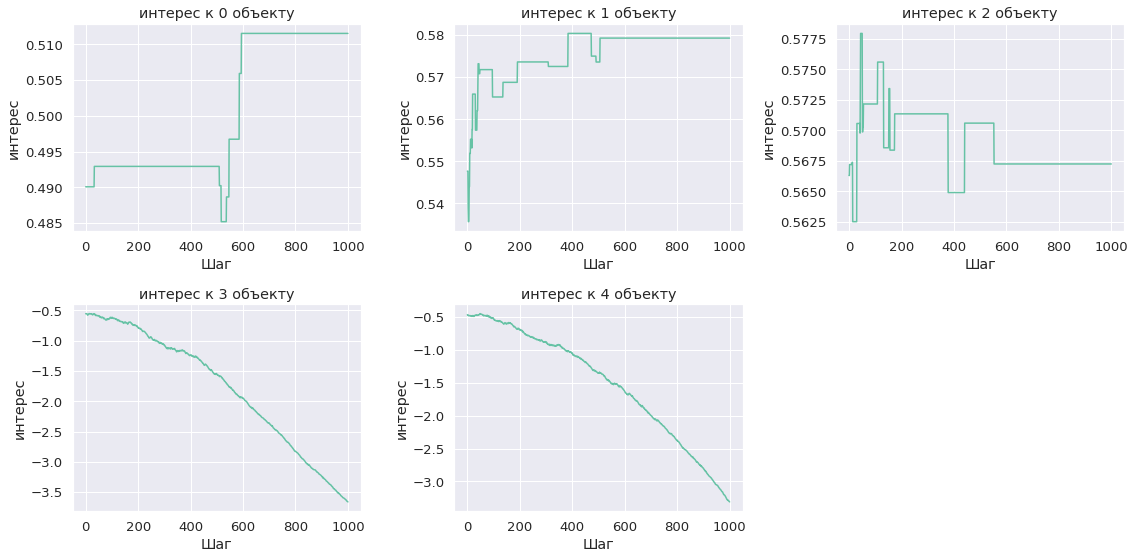

In [145]:
plt.figure(figsize=(16, 8))
for m in range(M):
    plt.subplot(M // 3 + 1, 3, m+1)

    plt.plot(interest[:, m])
    plt.title(f'интерес к {m} объекту')
    plt.ylabel('интерес')
    plt.xlabel('Шаг')

    plt.tight_layout()